# **Análisis exploratorio y estadística**

# AE11 - Proyecto - Reconstrucción análisis 538 - Fandango

## <font color='blue'>**Contexto**</font>

__[FiveThirtyEight](https://fivethirtyeight.com/)__, a veces representado como __538__, es un sitio web estadounidense que se centra en el análisis de encuestas de opinión, la política, la economía y los blogs deportivos.

En octubre de 2015, publico un análisis que tituló "Be Suspicious Of Online Movie Ratings, Especially Fandango’s" (Sospeche de las clasificaciones de películas en línea, especialmente de Fandango), en el cual analizaba y cuestionaba el hecho que __la misma empresa__ (Fandango) tenía un __conflicto de interés__ al __publicar las calificaciones__ de las películas y __vender entradas__ al mismo tiempo.

## <font color='blue'>**Preguntas de investigación**</font>
1. ¿Tienen Fandango alguna predisposición a calificar las películas por encima de lo que deberían calificar?
2. ¿Hay evidencias de conflicto de interés en un sitio web que nos entrega las calificaciones de laspelículas y que, además, nos vende entradas?


## <font color='blue'>**Misión**</font> 
Su objetivo es completar las actividades a continuación basándose en el artículo __538__ mencionado, y ver si llega a una conclusión similar. Utilice los conocimientos adquiridos (`Pandas`, `Numpy`,`Malplotlib`, visualización y estadísticas) para determinar si las calificaciones de Fandango en 2015 tenían un sesgo hacia calificar mejor las películas para vender más boletos. 

## <font color='green'>**Actividad 1**</font>
### Investigación de los antecedentes y los datos


1. Lea el artículo: [Sospeche de las calificaciones de películas en línea, especialmente las de Fandango](http://fivethirtyeight.com/features/fandango-movies-ratings/)
2. Lea los datasets del estudio. Hay dos archivos csv, uno con las calificaciones de Fandango (`fandango_scrape.csv`), y el otro con datos agregados para clasificaciones de películas de otros sitios, como Metacritic, IMDB y Rotten Tomatoes (`all_sites_scores.csv`). Los datos de Fandango se extrajeron el 24 de agosto de 2015, y contienen al menos 3o valoraciones de usuarios por película.
3. Explore las características de ambos datasets.

__Descripción de all_sites_scores.csv__

Columna | Contenido
--- | -----------
FILM | La película analizada
RottenTomatoes | Rotten Tomatoes Tomatometer valoración para la película
RottenTomatoes_User | Rotten Tomatoes valoración de usuario para la película
Metacritic | Metacritic valoración para la película
Metacritic_User | Metacritic valoración de usuario para la película
IMDB | IMDb valoración de usuario para la película
Metacritic_user_vote_count | Número de votos de usuario que tuvo la película en Metacritic
IMDB_user_vote_count | Número de votos de usuario que tuvo la película en IMDb


__Descripcioón de fandango_scrape.csv__

Contiene todas las películas analizadas por el sitio __538__..

Columna | Contenido
--- | ---------
FILM | La película analizada
STARS | Valoración en estrellas presentada en Fandango.com
RATING |El valor de calificación de Fandango para la película, extraído del HTML de cada página. Esta es la puntuación media real que obtuvo la película.
VOTES | Cantidad de personas que habían revisado la película en el momento en que la sacamos.

In [ ]:
# Tu código aquí ...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Lea los datasets del estudio. Hay dos archivos csv, uno con las calificaciones de Fandango (fandango_scrape.csv), 
# y el otro con datos agregados para clasificaciones de películas de otros sitios, como Metacritic, IMDB y Rotten Tomatoes (all_sites_scores.csv). 

path = '/content/drive/MyDrive/02_Analisis Exploratorio y Estadistica/Archivos'
sns.set(context='notebook',style='darkgrid',palette='dark')

fandango_df = pd.read_csv(path+"/fandango_scrape.csv")
AllSites_df = pd.read_csv(path+"/all_sites_scores.csv")


In [ ]:
# mostrar una muestra aletoria del dataset fandango
fandango_df.sample(5)

,FILM,STARS,RATING,VOTES
322,The Pardon (2015),4.0,4.0,7
270,Snow Girl and the Dark Crystal 3D (2015),4.0,3.8,14
185,Serena (2015),3.0,3.0,50
433,The Wanted 18 (2015),5.0,5.0,1
483,SDLFF: A Photographer's Journey (2015),0.0,0.0,0


In [ ]:
# mostrar una muestra aletoria del dataset allsites (Metacritic, IMDB y Rotten Tomatoes)
print(len(AllSites_df))
AllSites_df.sample(5)

146


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260
7,Top Five (2014),86,64,81,6.8,6.5,124,16876
142,'71 (2015),97,82,83,7.5,7.2,60,24116
45,Tomorrowland (2015),50,53,60,6.4,6.6,262,42937
76,Straight Outta Compton (2015),90,94,72,7.3,8.4,90,15982


<font color='green'>Fin actividad 1</font>

## <font color='green'>**Actividad 2**</font>

### Explorando las valoraciones mostradas en Fandango frente a las puntuaciones reales de los usuarios

Exploremos las calificaciones de Fandango para ver si nuestro análisis está de acuerdo con la conclusión del artículo.

1. Explore la relación entre la popularidad de una película y su calificación. Cree un diagrama de dispersión que muestre la relación entre la calificación y los votos. 
2. Calcule la correlación entre las distintas variables y visualícelas.
3. Calcule cuántas películas hay en Fandango por año y visualice.
4. Cuáles son las 10 películas con más votaciones?
5. Cuántas películas tienen cero votos?
6. Cree un nuevo DataFrame con las películas que tienen al menos un voto



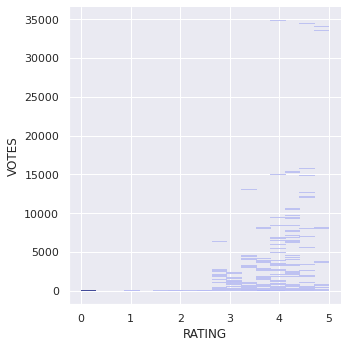

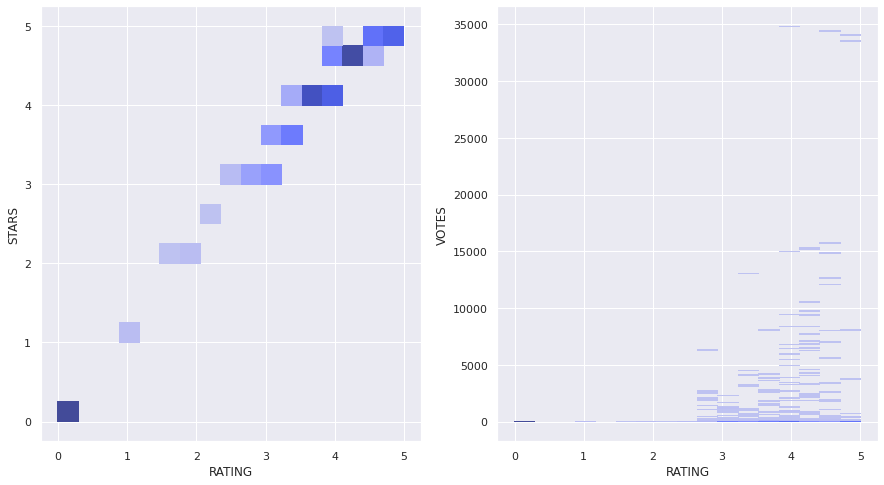

In [ ]:
# Tu código aquí ...
# 1. Relación entre la popularidad de una película y su calificación. Cree un diagrama de dispersión 
# que muestre la relación entre la calificación y los votos.


sns.displot(data=fandango_df, x="RATING", y="VOTES")
plt.show()


fig, ax = plt.subplots(1,2, figsize=(15, 8))

sns.histplot(data=fandango_df, x="RATING", y="STARS", ax = ax[0])
sns.histplot(data=fandango_df, x="RATING", y="VOTES", ax = ax[1])
plt.show()


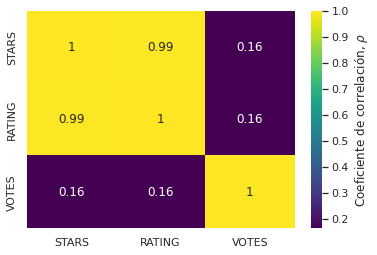

In [ ]:
# 2. Correlación entre las distintas variables

corr = fandango_df.corr() # Obtenemos la matriz de correlación para las variables númericas del set de datos de pingüinos

sns.heatmap(corr, annot=True, cmap='viridis', cbar_kws={'label': 'Coeficiente de correlación, $\u03C1$'}) #Generamos el heatmap anotado

plt.show()


In [ ]:
# 3. Creamos una nueva columna con el año incluido en el nombre de las películas

n_data  = len(fandango_df['FILM'])
yr_film = np.zeros(n_data)

#extract year from dataset
for i in np.arange(0, n_data):
  name_film = fandango_df['FILM'][i]
  yr_film[i] = name_film.split('(')[-1].split(')')[0]

fandango_df['YEAR'] = yr_film

In [ ]:
#inspeccionar dataframe con nueva columna
fandango_df.sample(5)

,FILM,STARS,RATING,VOTES,YEAR
192,Saint Laurent (2015),3.5,3.1,43,2015.0
371,Court (2015),4.0,3.7,3,2015.0
143,Maggie (2015),3.5,3.3,95,2015.0
238,She's Funny That Way (2015),4.0,3.8,21,2015.0
336,Ennum Eppozhum (2015),3.0,2.8,5,2015.0


In [ ]:
# 4. Las 10 películas con más votos

PelisMasVotos_df = fandango_df.sort_values(by='VOTES', axis=0, ascending=False)[0:10]
PelisMasVotos_df

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015.0
1,Jurassic World (2015),4.5,4.5,34390,2015.0
2,American Sniper (2015),5.0,4.8,34085,2015.0
3,Furious 7 (2015),5.0,4.8,33538,2015.0
4,Inside Out (2015),4.5,4.5,15749,2015.0
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014.0
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015.0
7,Minions (2015),4.0,4.0,14998,2015.0
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015.0
9,Into the Woods (2014),3.5,3.4,13055,2014.0


In [ ]:
# 5. Cuántas películas tienen cero votos

mask1 = fandango_df['VOTES'] == 0
fandango_df[mask1].sample(5)
print(f'En la base de datos existen {len(fandango_df[mask1])} peliculas sin votos')


En la base de datos existen 69 peliculas sin votos


In [ ]:
# 6. Creamos una nuevo DataFrame con las películas con al menos una valoración

fandango_conVotos_df = fandango_df[~mask1]
fandango_conVotos_df.sample(5)

,FILM,STARS,RATING,VOTES,YEAR
88,Hitman: Agent 47 (2015),4.0,3.9,917,2015.0
430,That Sugar Film (2015),5.0,5.0,1,2015.0
247,White God (2015),4.0,3.6,19,2015.0
165,The 100-Year-Old Man Who Climbed Out the Windo...,4.0,3.9,63,2015.0
182,Unity (2015),4.5,4.2,50,2015.0


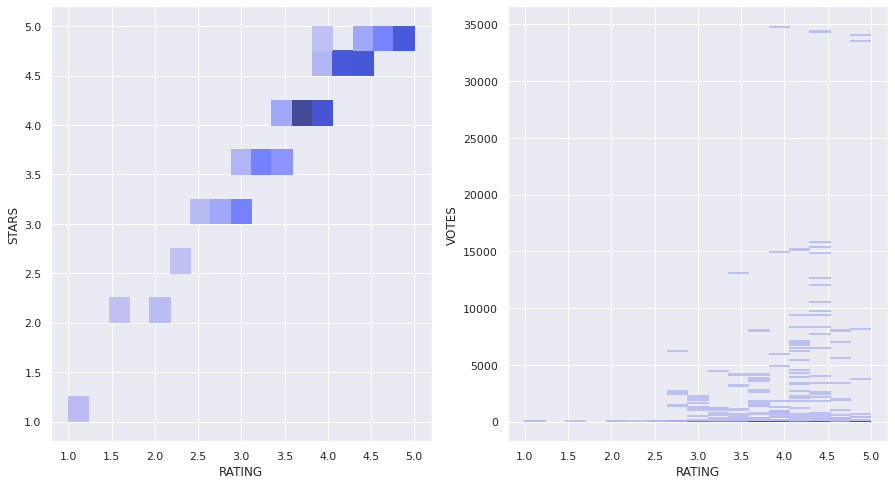

In [ ]:
#plotear nuevamente con nueva base de datos

fig, ax = plt.subplots(1,2, figsize=(15, 8))

sns.histplot(data=fandango_conVotos_df, x="RATING", y="STARS", ax = ax[0])
sns.histplot(data=fandango_conVotos_df, x="RATING", y="VOTES", ax = ax[1])
plt.show()


<font color='green'>Fin actividad 2</font>

## <font color='green'>**Actividad 3**</font>

En un sistema de redondeo normal, un sitio redondearía a la media estrella de valoración más cercana, hacia arriba o hacia abajo. Como se indica en el artículo, el sistema de redondeo de Fandango, y a modo de ejemplo, en el caso de "Ted 2", esperaríamos que la calificación se redondeara a 4 estrellas (dado que la valoración es de usuarios es 4.1). Sin embargo, Fandango redondeó el "ratingValue" hacia arriba, hasta un 4.5. Esto nos demuestra que la calificación real del usuario puede ser ligeramente diferente a la calificación que se le muestra a un usuario en el sitio web. 
Visualice esta diferencia en distribuciones.

1. Verifique con gráficos KDE rellenos si las distribuciones de las calificaciones que se muestran (STARS) son distintas a la calificación real de los votos (RATING). Tip: recorte los KDE a 0-5 con
`clip=[0,5]`

2. Si es que en el punto anterior hay una diferencia, cuantifíquela y añádala en una nueva columna del DataFrame. Esta nueva columna debe quedar expresada con un decimal.

3. Grafique la cantidad de veces que cada diferencia (0.1, 0.2, 0.3, etc.) se produce.

4. ¿Qué película(s) tiene(n) un diferencial de más de media estrella?

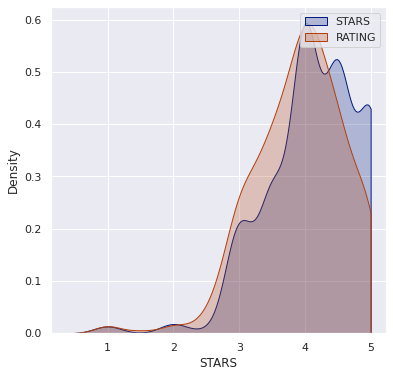

In [ ]:
# Tu código aquí ...
# 1. Comparamos los KDEs

fig, ax = plt.subplots(1,1, figsize=(6,6))

sns.kdeplot(data=fandango_conVotos_df, x="STARS", clip=[0,5], label = 'STARS', fill=True)
sns.kdeplot(data=fandango_conVotos_df, x="RATING", clip=[0,5], label = 'RATING', fill=True)

plt.legend()
# sns.displot(fandango_conVotos_df["STARS"], label = 'STARS')
# sns.displot(fandango_conVotos_df["RATING"], label = 'RATING')
plt.show()

In [ ]:
# 2. Cuantifiquemos ahora realmente esta discrepancia. 
# Si es que en el punto anterior hay una diferencia, cuantifíquela y añádala en una nueva columna del DataFrame. 
# Esta nueva columna debe quedar expresada con un decimal.

# STARS	Valoración en estrellas presentada en Fandango.com
# RATING	El valor de calificación de Fandango para la película, extraído del HTML de cada página. Esta es la puntuación media real que obtuvo la película.

fandango_conVotos_df['diffStars'] = np.round(fandango_conVotos_df['STARS'] - fandango_conVotos_df['RATING'], 1)
fandango_conVotos_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,FILM,STARS,RATING,VOTES,YEAR,diffStars
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015.0,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015.0,0.0
2,American Sniper (2015),5.0,4.8,34085,2015.0,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015.0,0.2
4,Inside Out (2015),4.5,4.5,15749,2015.0,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015.0,0.0
431,The Intern (2015),5.0,5.0,1,2015.0,0.0
432,The Park Bench (2015),5.0,5.0,1,2015.0,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015.0,0.0


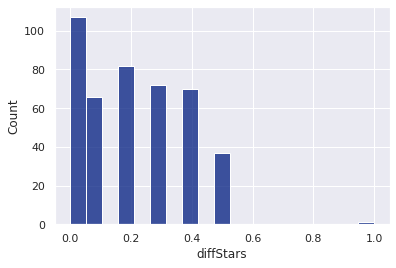

In [ ]:
# 3. Cantidad de veces que las diferencias se producen.

sns.histplot(data=fandango_conVotos_df, x="diffStars", label = 'DIFERENCIAS')
plt.show()

# Conclusión: todos los "erorres" son positivos, es decir, siempre se sobreestima las estrellas

In [ ]:
# 4. Buscamos la pelicula con una diferencia de una estrella
# ¿Qué película(s) tiene(n) un diferencial de más de media estrella?

mask1 =  fandango_conVotos_df['diffStars'] >= 1

fandango_conVotos_df[mask1]

# fandango_conVotos_dif05_df


,FILM,STARS,RATING,VOTES,YEAR,diffStars
381,Turbo Kid (2015),5.0,4.0,2,2015.0,1.0


In [ ]:
# ¿Qué película(s) tiene(n) un diferencial de más de media estrella?

mask2 =  fandango_conVotos_df['diffStars'] >= 0.5

list_films = fandango_conVotos_df[mask2]['FILM'].to_list()
list_films

['Avengers: Age of Ultron (2015)',
 'Cinderella (2015)',
 'Ant-Man (2015)',
 'Top Five (2014)',
 'Do You Believe? (2015)',
 'Hot Tub Time Machine 2 (2015)',
 'Shaun the Sheep Movie (2015)',
 'Love & Mercy (2015)',
 'Far From The Madding Crowd (2015)',
 'The Water Diviner (2015)',
 'Irrational Man (2015)',
 'Black Sea (2015)',
 'Leviathan (2014)',
 'Royal Ballet: Swan Lake (2015)',
 'Exhibition OnScreen: Matisse (2015)',
 'Twinsters (2015)',
 'Premam (2015)',
 'In the Name of my Daughter (2015)',
 'The Metropolitan Opera: La Donna del Lago Encore (2015)',
 'Antony and Cleopatra (Stratford Festival) (2015)',
 'Big Game (2015)',
 'The Algerian (2015)',
 'Human Capital (2015)',
 'Heaven Knows What (2015)',
 'Girlhood (2015)',
 'Dark Awakening (2015)',
 '12 Golden Ducks (2015)',
 'Vaalu (2015)',
 'The Little Death (2015)',
 'Detective K: Secret of the Lost Island (2015)',
 'Fort Tilden (2015)',
 'ESL One Cologne Counter-Strike: GO Finals Live (2015)',
 'People, Places, Things (2015)',
 'Ten

<font color='green'>Fin actividad 3</font>

## <font color='green'>**Actividad 4**</font>
## Comparación de las valoraciones de Fandango con Rotten Tomatoes

Compare las valoraciones de Fandango con la de __Rotten Tomatoes__. Analice y comente las diferencias.

1. Analice __Rotten Tomatoes__ (__RT__). Observe cómo el sitio tiene dos valoraciones; una de críticos especializados y otra de usuarios. Realice una visualización de dispersión de ambas variables.

2. Determine la diferencia comparando las calificaciones de los críticos y las calificaciones de los usuarios de __RT__. Cree una nueva columna basada en la diferencia entre las calificaciones de los críticos y las calificaciones de los usuarios para Rotten Tomatoes. Calcule esto con `RottenTomatoes - RottenTomatoes_User`

3. Calcule la diferencia media absoluta obtenida en el punto 2. Atención con los valores negativos. 

4. Visualice con 2 subplots horizontales:
  * La distribución de las diferencias entre `RT Critics Score` y `RT User Score`. Debe haber valores negativos en esta gráfica de distribución. Utilice KDE e histogramas para mostrar esta distribución.
  * La distribución que muestre la diferencia en valor absoluto.
  * Incluya un título a cada subplot y un título general a nivel del lienzo (figure).

5. ¿Cuáles son las 10 películas más valoradas por los usuarios en promedio que los críticos? Y ¿Cuáles son las 10 películas con mejores valoraciones de críticos de películas que de usuarios?

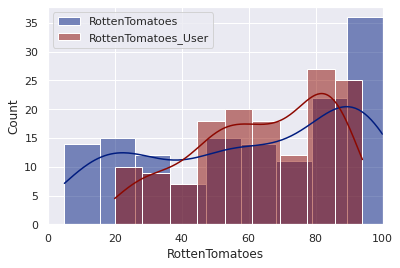

<Figure size 432x288 with 0 Axes>

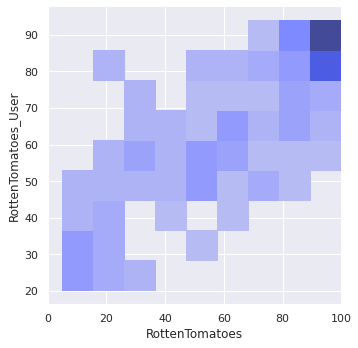

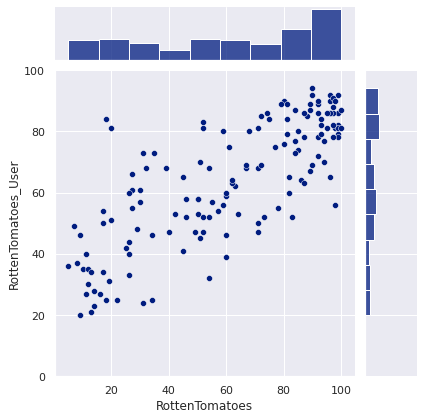

In [ ]:
# Tu código aquí ...
# 1. Dispersión de RT
# AllSites_df
# RottenTomatoes	Rotten Tomatoes Tomatometer valoración para la película
# RottenTomatoes_User	Rotten Tomatoes valoración de usuario para la película

plt.figure()

sns.histplot(x= 'RottenTomatoes', data = AllSites_df, kde=True, label = 'RottenTomatoes', color='b')
sns.histplot(x= 'RottenTomatoes_User', data = AllSites_df, kde=True, label = 'RottenTomatoes_User', color='r')
plt.xlim([0, 100])
plt.legend()
plt.show()

#
plt.figure()
sns.displot(x= 'RottenTomatoes', y= 'RottenTomatoes_User', data = AllSites_df) #, kind='kde'
plt.xlim([0, 100])
plt.show()

#
plt.show()
sns.jointplot(x= 'RottenTomatoes', y= 'RottenTomatoes_User', data=AllSites_df)
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.show()

<Figure size 432x288 with 0 Axes>

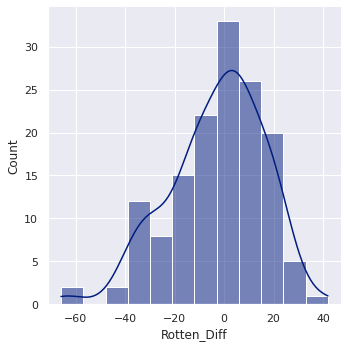

In [ ]:
# 2.  =  Critics - User Score. 

AllSites_df['Rotten_Diff'] = AllSites_df['RottenTomatoes'] - AllSites_df['RottenTomatoes_User']
AllSites_df.sample(5)

# np.min(AllSites_df['Rotten_Diff'])
# np.max(AllSites_df['Rotten_Diff'])

plt.figure()
sns.displot(x= 'Rotten_Diff', data = AllSites_df, kde=True)
plt.show()


In [ ]:
# 3. Diferencia media absoluta

# np.mean(AllSites_df['Rotten_Diff'])

mean_abs_value = np.mean( np.abs(AllSites_df['Rotten_Diff']) )
print(f'La diferencia media absoluta es de {np.round(mean_abs_value,2)}')

mean_value = np.mean( AllSites_df['Rotten_Diff'] ) 
print(f'La diferencia media es de {np.round(mean_value,2)}')



La diferencia media absoluta es de 15.1
La diferencia media es de -3.03


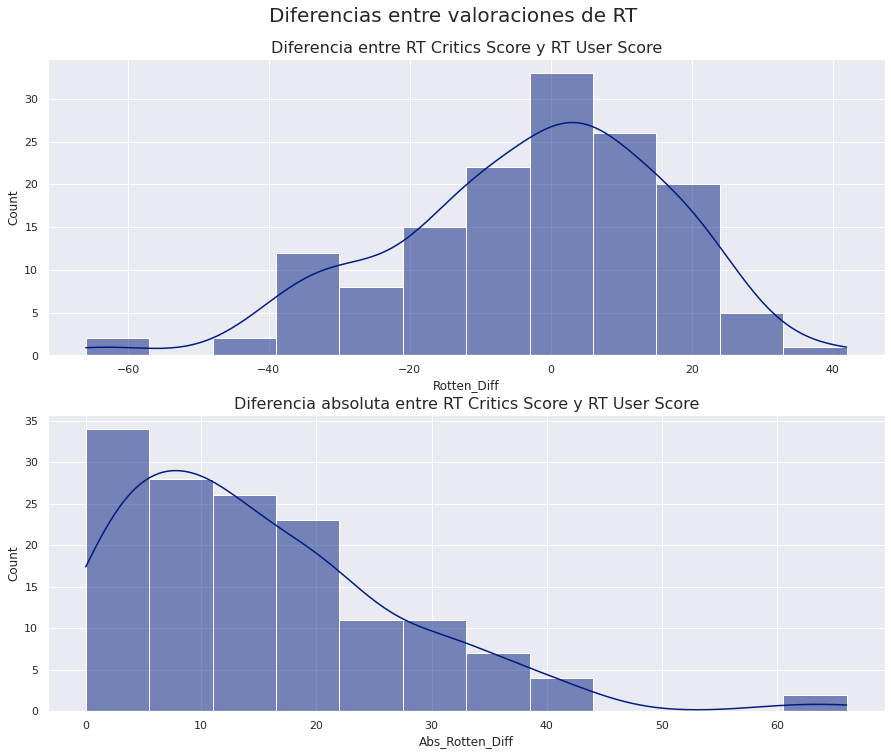

In [ ]:
# 4. Visualización de la distribución de las diferencias y del valor absoluto de las diferencias
# Visualice con 2 subplots horizontales:

# La distribución de las diferencias entre RT Critics Score y RT User Score. Debe haber valores negativos en esta gráfica de distribución. Utilice KDE e histogramas para mostrar esta distribución.
# La distribución que muestre la diferencia en valor absoluto.
# Incluya un título a cada subplot y un título general a nivel del lienzo (figure).

fig, ax = plt.subplots(2,1,figsize=(15,12))

sns.histplot(x='Rotten_Diff', data = AllSites_df, kde= True, ax = ax[0])
ax[0].set_title('Diferencia entre RT Critics Score y RT User Score', fontsize= 16)

AllSites_df['Abs_Rotten_Diff'] = np.abs(AllSites_df['Rotten_Diff'])
sns.histplot(x='Abs_Rotten_Diff', data = AllSites_df, kde= True, ax = ax[1] )
ax[1].set_title('Diferencia absoluta entre RT Critics Score y RT User Score', fontsize= 16)

fig.suptitle('Diferencias entre valoraciones de RT', fontsize=20, y=0.94)
plt.show()


In [ ]:
# 5. Películas películas más valoradas por los usuarios que por los críticos
# ¿Cuáles son las 10 películas más valoradas por los usuarios en promedio que los críticos? Y 

# AllSites_df['Rotten_Diff'] = AllSites_df['RottenTomatoes'] - AllSites_df['RottenTomatoes_User'], esto implica que si el valor es más negativo (AllSites_df['Rotten_Diff'] <0), 
# la valoración de usuario es mayor que la de los criticos => AllSites_df['RottenTomatoes'] < AllSites_df['RottenTomatoes_User']

MostValueUsers = AllSites_df.sort_values(by = 'Rotten_Diff')[0:10]
MostValueUsers


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Abs_Rotten_Diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61,61
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42,42
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42,42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39,39
132,Max (2015),35,73,47,5.9,7.0,15,5444,-38,38
19,Pixels (2015),17,54,27,5.3,5.6,246,19521,-37,37
15,Taken 3 (2015),9,46,26,4.6,6.1,240,104235,-37,37
51,Entourage (2015),32,68,38,5.2,7.1,96,21914,-36,36
49,Terminator Genisys (2015),26,60,38,6.4,6.9,779,85585,-34,34


In [ ]:
# Películas más valoradas por los críticos que por los usuarios
# ¿Cuáles son las 10 películas con mejores valoraciones de críticos de películas que de usuarios?
# Hay que hacer lo mismo que en la pelicula anterior, pero al revés

MostValueCritics = AllSites_df.sort_values(by = 'Rotten_Diff', ascending=False)[0:10]
MostValueCritics


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Abs_Rotten_Diff
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31,31
145,"Kumiko, The Treasure Hunter (2015)",87,63,68,6.4,6.7,19,5289,24,24
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24,24
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,24,24
90,The SpongeBob Movie: Sponge Out of Water (2015),78,55,62,6.5,6.1,196,26046,23,23
7,Top Five (2014),86,64,81,6.8,6.5,124,16876,22,22
11,Black Sea (2015),82,60,62,6.6,6.4,37,16547,22,22
116,Clouds of Sils Maria (2015),89,67,78,7.1,6.8,36,11392,22,22


<font color='green'>Fin actividad 4</font>

## <font color='green'>**Actividad 5**</font>
## Comparación de las valoraciones de Fandango con MetaCritic

Ahora echemos un vistazo a las calificaciones de __MetaCritic__. Metacritic también muestra una calificación de usuario promedio en comparación con su calificación oficial mostrada.

1. Realice una visualización de dispersión de ambas variables.

2. Determine la diferencia comparando las calificaciones de los críticos y las calificaciones de los usuarios de __RT__. De forma similar a la __Actividad 4__ cree una nueva columna basada en la diferencia entre las calificaciones de los críticos y las calificaciones de los usuarios para MetaCritic. Calcule esto con `Metacritic - Metacritic_User`

3. Visualice las comparación de diferencias de __RT__ con las de __MetaCritic__.

In [ ]:
AllSites_df['Metacritic_User10'] = AllSites_df['Metacritic_User']*10
AllSites_df[['Metacritic', 'Metacritic_User', 'Metacritic_User10']].sample(5)

,Metacritic,Metacritic_User,Metacritic_User10
86,74,8.4,84.0
60,32,3.8,38.0
21,52,6.9,69.0
61,50,6.8,68.0
19,27,5.3,53.0


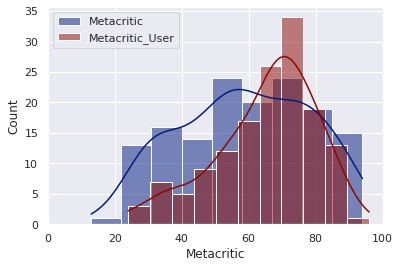

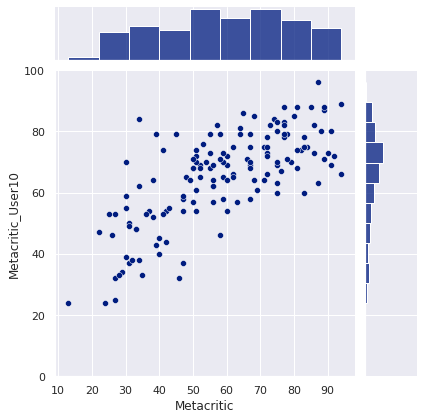

In [ ]:
# Tu código aquí ...
# 1. Visualización de dispersión de crítica oficial versus de usuarios

# Nota: Al parecer la escala entre ambas metricas es diferente, Metacritic va de 0 a 100, mientras que, Metacritic_User va de 0 a 10. 
# Se ha multiplicado por 10 para homologar las escalas

plt.figure()
sns.histplot(x= 'Metacritic', data = AllSites_df, kde=True, label = 'Metacritic', color='b')
sns.histplot(x= 'Metacritic_User10', data = AllSites_df, kde=True, label = 'Metacritic_User', color='r')
plt.xlim([0, 100])
plt.legend()
plt.show()

#
plt.figure()
sns.jointplot(x= 'Metacritic', y= 'Metacritic_User10', data=AllSites_df)
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.show()


In [ ]:
# 2. Metacritic_Diff =  Criticos - Usuarios 
AllSites_df['Metacritic_Diff'] = AllSites_df['Metacritic'] - AllSites_df['Metacritic_User10']
AllSites_df['Metacritic_Diff'].sample(5)

119    11.0
40      6.0
97     14.0
77    -28.0
144    17.0
Name: Metacritic_Diff, dtype: float64

<Figure size 432x288 with 0 Axes>

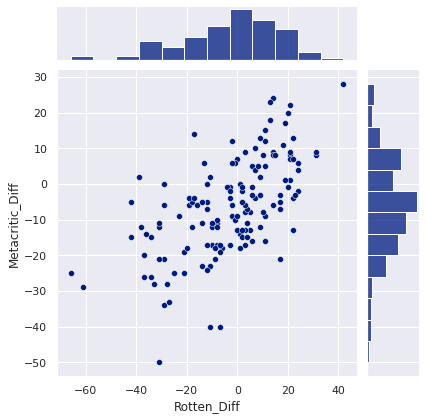

,Rotten_Diff,Metacritic_Diff
Rotten_Diff,1.000000,0.609454
Metacritic_Diff,0.609454,1.000000


In [ ]:
# 3. Dispersión de diferencias
# Visualice las comparación de diferencias de RT con las de MetaCritic.

plt.figure()
sns.jointplot(x= 'Rotten_Diff', y= 'Metacritic_Diff', data=AllSites_df)
plt.show()

AllSites_df[['Rotten_Diff', 'Metacritic_Diff']].corr()


_Conclusión_: se ve una correlación lineal ($\rho$=0.61) entre ambas diferencias, por lo que se podria decir que en ambas páginas las diferencias entre usuarios y criticos estan correlacionadas y son coherentes.

<font color='green'>Fin actividad 5</font>

## <font color='green'>**Actividad 6**</font>
## Comparación de valoraciones de Fandago vs. All Sites

Explore si Fandango muestra artificialmente calificaciones más altas que las justificadas para impulsar la venta de boletos.

1. Combine ambos datasets (`Fandango` con `All_Sites`). ¿Cuántos registros se pierden en la fusión?
2. Normalice las columnas para que sus escalas sean comparables. Fandango utiliza una escala de $0-5$ para `STARS` y `RATINGS`.
3. Simplifique el DataFrame. Genere una copia con las valoraciones normalizadas. Incluya `STARS`y `RATING` desde Fandango.
4. Compare de la distribución de puntuaciones entre sitios. ¿Fandango muestra calificaciones anormalmente altas? Ya sabemos que su `RATIBG` mostrado es más alto que las valoraciones de usuarios (`STARS`), pero ¿son las calificaciones en sí mismas más altas que el promedio? Analice y comente.
5. Cree una gráfica `hisplot` comparando todas las puntuaciones normalizadas.
6. ¿Cómo se califican las peores películas en todos los sitios? Cree una visualización del tipo `clustermap` de todas las puntuaciones normalizadas. Investigue acerca de esta gráfica avanzada de `Seaborn`.
7. Según las calificaciones de los críticos de __RT__, ¿cuáles son las 10 películas con las calificaciones más bajas? ¿Cuáles son las puntuaciones normalizadas en los otros sitios para estas películas? 

In [ ]:
# 1. Merge de ambos datasets
# Combine ambos datasets (Fandango con All_Sites). ¿Cuántos registros se pierden en la fusión?

AllSites_wfandango_df = pd.merge(fandango_df, AllSites_df, how='inner', on=['FILM'])

print(10*'-----')
print(f'Tamaños de las bases de datos')
print(10*'-----')
print(f'La base de datos de fandango tiene {len(fandango_df)} datos')
print(f'La base de datos de AllSites tiene {len(AllSites_df)} datos')
print(f'La base de datos combinada (fandango+AllSites) tiene {len(AllSites_wfandango_df)} datos')
print(f'Se perdieron {max([len(fandango_df), len(AllSites_df)]) - len(AllSites_wfandango_df)} datos')

print()
AllSites_wfandango_df.sample(5)


--------------------------------------------------
Tamaños de las bases de datos
--------------------------------------------------
La base de datos de fandango tiene 504 datos
La base de datos de AllSites tiene 146 datos
La base de datos combinada (fandango+AllSites) tiene 145 datos
Se perdieron 359 datos



,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
76,Still Alice (2015),4.5,4.1,1258,2015.0,88,85,72,7.8,7.5,153,57123
47,Insidious: Chapter 3 (2015),4.5,4.1,3276,2015.0,59,56,52,6.9,6.3,115,25134
27,Ted 2 (2015),4.5,4.1,6437,2015.0,46,58,48,6.5,6.6,197,49102
80,Inherent Vice (2014),3.0,2.9,1078,2014.0,73,52,81,7.4,6.7,286,44711
2,American Sniper (2015),5.0,4.8,34085,2015.0,72,85,72,6.6,7.4,850,251856


In [ ]:
# 2. Normalización de las valoraciones
# Normalice las columnas para que sus escalas sean comparables. Fandango utiliza una escala de  0−5  para STARS y RATINGS.
# Todos los votos quedarán en la escala de 1-100

AllSites_wfandango_df['Stars_100']           = AllSites_wfandango_df['STARS']*20
AllSites_wfandango_df['Rating_100']          = AllSites_wfandango_df['RATING']*20 
AllSites_wfandango_df['Metacritic_User100']  = AllSites_wfandango_df['Metacritic_User']*10


In [ ]:
# 3. Simplificación del DataFrame
# Simplifique el DataFrame. Genere una copia con las valoraciones normalizadas. Incluya STARSy RATING desde Fandango.

AllSites_wfandango_copy_df = AllSites_wfandango_df
AllSites_wfandango_copy_df.drop(['VOTES', 'IMDB', 'IMDB_user_vote_count', 'Metacritic_user_vote_count', 'Metacritic_User'], axis=1, inplace=True)
AllSites_wfandango_copy_df.sample(5)

,FILM,STARS,RATING,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Stars_100,Rating_100,Metacritic_User100
1,Jurassic World (2015),4.5,4.5,2015.0,71,81,59,90.0,90.0,70.0
107,Wild Tales (2014),4.5,4.1,2014.0,96,92,77,90.0,82.0,88.0
32,Night at the Museum: Secret of the Tomb (2014),4.5,4.1,2014.0,50,58,47,90.0,82.0,58.0
6,Kingsman: The Secret Service (2015),4.5,4.2,2015.0,75,84,58,90.0,84.0,79.0
94,American Ultra (2015),4.0,3.7,2015.0,46,52,50,80.0,74.0,68.0


In [ ]:
# 4. Comparando distribuciones de valoraciones
# Compare de la distribución de puntuaciones entre sitios. ¿Fandango muestra calificaciones anormalmente altas? 
# Ya sabemos que su RATIBG mostrado es más alto que las valoraciones de usuarios (STARS), 
# pero ¿son las calificaciones en sí mismas más altas que el promedio? Analice y comente.

for web_site in ['Rating_100','Metacritic','RottenTomatoes']:
  mean = AllSites_wfandango_copy_df[web_site].describe()['mean']
  std = AllSites_wfandango_copy_df[web_site].describe()['std']
  median = AllSites_wfandango_copy_df[web_site].describe()['50%']
  q3 = AllSites_wfandango_copy_df[web_site].describe()['75%']
  q1 = AllSites_wfandango_copy_df[web_site].describe()['25%']

  print(10*'----')
  print(f'Base de datos: {web_site}')
  print(f'  La media de los votos es {np.round(mean, 2)} \u00B1 {np.round(std, 2)}')
  print(f'  La mediana de los votos es {np.round(median, 2)}')
  print(f'  El rango intercuartil de los votos es {np.round(q3 - q1, 2)}')


----------------------------------------
Base de datos: Rating_100
  La media de los votos es 76.83 ± 10.05
  La mediana de los votos es 78.0
  El rango intercuartil de los votos es 14.0
----------------------------------------
Base de datos: Metacritic
  La media de los votos es 58.7 ± 19.54
  La mediana de los votos es 59.0
  El rango intercuartil de los votos es 32.0
----------------------------------------
Base de datos: RottenTomatoes
  La media de los votos es 60.63 ± 30.16
  La mediana de los votos es 63.0
  El rango intercuartil de los votos es 58.0


*Conclusión*: Para el mismo set de datos, los votos presentados por Fandango (Rating_100) son mayores que los presentados por otras páginas web (Metacritic y RottenTomatoes). Metacritic y RottenTomatoes tienen una media bastante similar (~60 puntos), mientras que la media de Fandango está ~17 puntos (76.8) sobre la media de las mencionadas páginas.
Similares resultados se muestran desde la perspectiva de la mediana, y adicionalmente el rango intercuartil de Fandango es estrecho (14 puntos) por lo que la gran mayoria de sus votos se encuentra en el rango expresado en la mediana, mientras que los rangos intercuartiles de las otras páginas webs es más grande (en particular el de RottenTomatoes que presenta la mayor desviación de datos). 


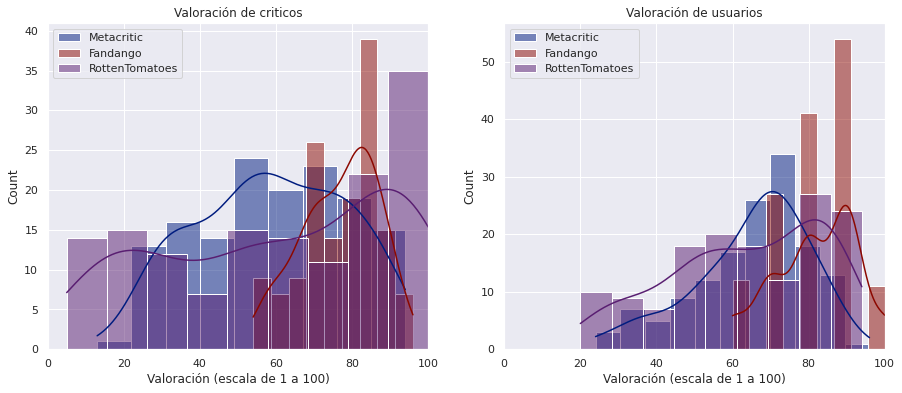

In [ ]:
# 5. Hisplot comparando todas las puntuaciones normalizadas.

fig, ax = plt.subplots(1,2, figsize=(15,6))

sns.histplot(x= 'Metacritic', data = AllSites_wfandango_copy_df, kde=True, label = 'Metacritic', color='b', ax = ax[0])
sns.histplot(x= 'Rating_100', data = AllSites_wfandango_copy_df, kde=True, label = 'Fandango', color='r', ax = ax[0])
sns.histplot(x= 'RottenTomatoes', data = AllSites_wfandango_copy_df, kde=True, label = 'RottenTomatoes', color='m', ax = ax[0])
ax[0].set_xlim([0, 100])
ax[0].legend()
ax[0].set_xlabel('Valoración (escala de 1 a 100)')
ax[0].set_title('Valoración de criticos')

sns.histplot(x= 'Metacritic_User100', data = AllSites_wfandango_copy_df, kde=True, label = 'Metacritic', color='b', ax = ax[1])
sns.histplot(x= 'Stars_100', data = AllSites_wfandango_copy_df, kde=True, label = 'Fandango', color='r', ax = ax[1])
sns.histplot(x= 'RottenTomatoes_User', data = AllSites_wfandango_copy_df, kde=True, label = 'RottenTomatoes', color='m', ax = ax[1])
ax[1].set_xlim([0, 100])
ax[1].legend()
ax[1].set_xlabel('Valoración (escala de 1 a 100)')
ax[1].set_title('Valoración de usuarios')

plt.show()


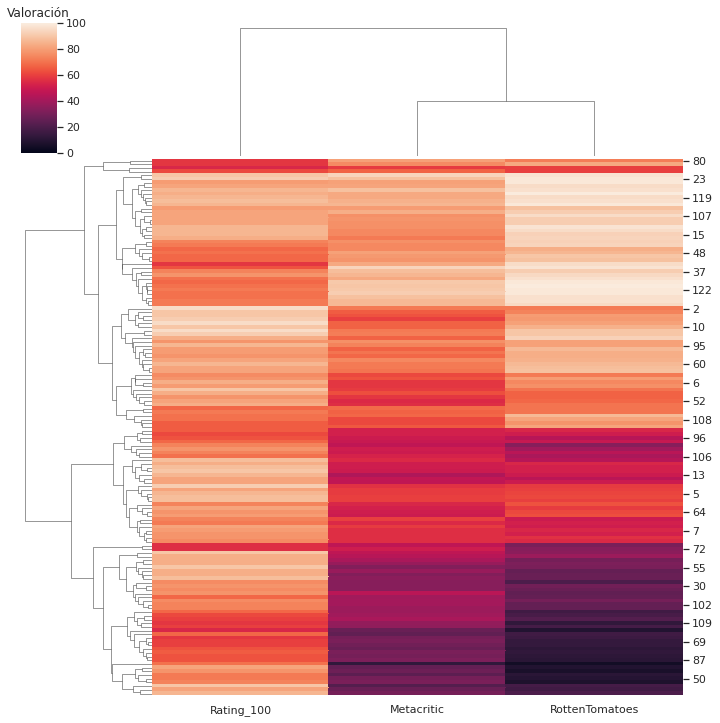

In [ ]:
# 6. clustermap
# ¿Cómo se califican las peores películas en todos los sitios? 
# Cree una visualización del tipo clustermap de todas las puntuaciones normalizadas. Investigue acerca de esta gráfica avanzada de Seaborn

# documentation: https://seaborn.pydata.org/generated/seaborn.clustermap.html
# usage: g = sns.clustermap(iris)

g = sns.clustermap(AllSites_wfandango_copy_df[['Rating_100','Metacritic','RottenTomatoes']], vmin=0, vmax=100 )
g.ax_cbar.set_title('Valoración')

plt.show()


_Conclusion_: El clustermap muestra como esta jerarquizada la data de acuerdo a la "distancia" entre los datos. Del analisis del dendrograma (https://es.wikipedia.org/wiki/Dendrograma) se muestra que Metracritic y RottenTomatoes son más parecido, mientras que las notas de Fandango (Rating_100) simplemente pueden ser considerados como otro grupo de datos. Esto da cuenta que Fandango no sigue la tendencia que las otras páginas webs.

En el gráfico de clustermap las peores calificaciones se concentran en la zona baja del grafico (colores más oscuros), estan ubicados bajo el tick 87 hacia abajo.

In [ ]:
# 7. Examinemos las 10 peores películas. Según las calificaciones de los críticos de RT, 
# ¿cuáles son las 10 películas con las calificaciones más bajas? ¿Cuáles son las puntuaciones normalizadas en los otros sitios para estas películas?

sortVotes_df = AllSites_wfandango_copy_df.sort_values(by='RottenTomatoes')[0:10]
count_film = 0

print(f'Las 10 peliculas peor calificadas por los críticos de RT ')
for index in sortVotes_df.index:
  count_film += 1
  name_film   = sortVotes_df['FILM'][index]
  rate_RT = sortVotes_df['RottenTomatoes'][index] 
  rate_Fandango = sortVotes_df['Rating_100'][index]
  rate_Metacritic = sortVotes_df['Metacritic_User100'][index]
  print(5*'----')
  print(f'\t#{count_film}: {name_film}')
  print(f'\tCalificaciones: \tRT: {rate_RT} \tMetacritic: {round(rate_Metacritic)} \tFandango: {round(rate_Fandango)}')
  


Las 10 peliculas peor calificadas por los críticos de RT 
--------------------
	#1: Paul Blart: Mall Cop 2 (2015)
	Calificaciones: 	RT: 5 	Metacritic: 24 	Fandango: 70
--------------------
	#2: Hitman: Agent 47 (2015)
	Calificaciones: 	RT: 7 	Metacritic: 33 	Fandango: 78
--------------------
	#3: Hot Pursuit (2015)
	Calificaciones: 	RT: 8 	Metacritic: 37 	Fandango: 74
--------------------
	#4: Taken 3 (2015)
	Calificaciones: 	RT: 9 	Metacritic: 46 	Fandango: 82
--------------------
	#5: Fantastic Four (2015)
	Calificaciones: 	RT: 9 	Metacritic: 25 	Fandango: 54
--------------------
	#6: The Boy Next Door (2015)
	Calificaciones: 	RT: 10 	Metacritic: 55 	Fandango: 72
--------------------
	#7: The Loft (2015)
	Calificaciones: 	RT: 11 	Metacritic: 24 	Fandango: 72
--------------------
	#8: Unfinished Business (2015)
	Calificaciones: 	RT: 11 	Metacritic: 38 	Fandango: 64
--------------------
	#9: Mortdecai (2015)
	Calificaciones: 	RT: 12 	Metacritic: 32 	Fandango: 64
--------------------
	#

<font color='green'>Fin actividad 6</font>